In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

data = pd.read_csv("world_population_by_country_2023.csv")
#dataset source: https://www.kaggle.com/datasets/chandanchoudhury/world-population-dataset/data
data.head(10)

,country,population,yearly_change,net_change,density,land_area,net_migrants,fertility_rate,median_age,population_urban,world_share
0,Afghanistan,42239854,2.70,1111083,65,652860,-65846,4.4,17.0,26.0,0.53
1,Albania,2832439,-0.35,-9882,103,27400,-8000,1.4,38.0,67.0,0.04
2,Algeria,45606480,1.57,703255,19,2381740,-9999,2.8,28.0,75.0,0.57
3,American Samoa,43914,-0.81,-359,220,200,-790,2.2,29.0,NaN,0.00
4,Andorra,80088,0.33,264,170,470,200,1.1,43.0,85.0,0.00
5,Angola,36684202,3.08,1095215,29,1246700,-1000,5.1,16.0,68.0,0.46
6,Anguilla,15899,0.26,42,177,90,0,1.3,38.0,98.0,0.00
7,Antigua and Barbuda,94298,0.57,535,214,440,0,1.6,36.0,28.0,0.00
8,Argentina,45773884,0.58,263566,17,2736690,3718,1.9,32.0,94.0,0.57
9,Armenia,2777970,-0.09,-2499,98,28470,-5000,1.6,35.0,67.0,0.03


In [128]:
data.tail(10)

,country,population,yearly_change,net_change,density,land_area,net_migrants,fertility_rate,median_age,population_urban,world_share
224,Uruguay,3423108,0.01,314,20,175020,-1500,1.5,36.0,99.0,0.04
225,Uzbekistan,35163944,1.55,536292,83,425400,-19999,2.8,27.0,49.0,0.44
226,Vanuatu,334506,2.38,7766,27,12190,0,3.7,20.0,24.0,0.00
227,Venezuela,28838499,1.90,536803,33,882050,321106,2.2,28.0,NaN,0.36
228,Vietnam,98858950,0.68,672094,319,310070,-82700,1.9,33.0,40.0,1.23
229,Wallis & Futuna,11502,-0.60,-70,82,140,-119,1.9,37.0,0.0,0.00
230,Western Sahara,587259,1.96,11273,2,266000,5600,2.2,32.0,95.0,0.01
231,Yemen,34449825,2.24,753211,65,527970,-29914,3.6,19.0,37.0,0.43
232,Zambia,20569737,2.76,552062,28,743390,-5000,4.2,17.0,46.0,0.26
233,Zimbabwe,16665409,2.11,344872,43,386850,-9999,3.4,18.0,37.0,0.21


In [129]:
data.isnull().sum()
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, 0 to 233
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           216 non-null    object 
 1   population        216 non-null    int64  
 2   yearly_change     216 non-null    float64
 3   net_change        216 non-null    int64  
 4   density           216 non-null    int64  
 5   land_area         216 non-null    int64  
 6   net_migrants      216 non-null    int64  
 7   fertility_rate    216 non-null    float64
 8   median_age        216 non-null    float64
 9   population_urban  216 non-null    float64
 10  world_share       216 non-null    float64
dtypes: float64(5), int64(5), object(1)
memory usage: 20.2+ KB


In [130]:
data.shape

(216, 11)

In [131]:
data.nunique() 

country             216
population          216
yearly_change       167
net_change          216
density             155
land_area           212
net_migrants        135
fertility_rate       44
median_age           36
population_urban     77
world_share          69
dtype: int64

In [132]:
data.describe()

,population,yearly_change,net_change,density,land_area,net_migrants,fertility_rate,median_age,population_urban,world_share
count,2.160000e+02,216.000000,2.160000e+02,216.000000,2.160000e+02,2.160000e+02,216.000000,216.000000,216.000000,216.000000
mean,3.696489e+07,1.009583,3.216458e+05,292.018519,5.965646e+05,-1.828509e+03,2.454630,30.754630,59.550926,0.459676
std,1.427023e+08,1.264190,1.039379e+06,1606.582020,1.753214e+06,1.754066e+05,1.183757,9.567385,23.826450,1.773890
min,1.893000e+03,-7.450000,-2.957105e+06,0.000000,1.000000e+01,-9.104750e+05,0.900000,15.000000,0.000000,0.000000
25%,6.170975e+05,0.257500,2.987500e+02,37.000000,1.009250e+04,-9.999000e+03,1.600000,22.000000,40.750000,0.010000
50%,6.601908e+06,0.835000,3.549300e+04,91.000000,9.106000e+04,-8.250000e+02,2.000000,32.000000,61.500000,0.080000
75%,2.623039e+07,1.835000,2.621650e+05,225.750000,4.373150e+05,4.250000e+02,3.125000,39.000000,79.250000,0.330000
max,1.428628e+09,4.980000,1.145449e+07,23472.000000,1.637687e+07,1.784718e+06,6.700000,53.000000,99.000000,17.760000


In [109]:
fig = px.scatter_geo(data, locations='country',locationmode="country names",scope="world",color="median_age",size="population", size_max=25, title="Median age across the countries",template='seaborn',color_continuous_scale="spectral")
fig.show()

In [110]:
most_dense = data[['density', 'country']].sort_values(by="density",ascending=False)
most_dense = most_dense.head(10)
most_dense = most_dense.sort_values(by="density",ascending=True)
most_dense

,density,country
204,676,Taiwan
133,778,Micronesia
198,892,State of Palestine
131,896,Mayotte
22,1281,Bermuda
187,1301,Sint Maarten
16,1329,Bangladesh
126,1672,Malta
124,1737,Maldives
120,23472,Macao


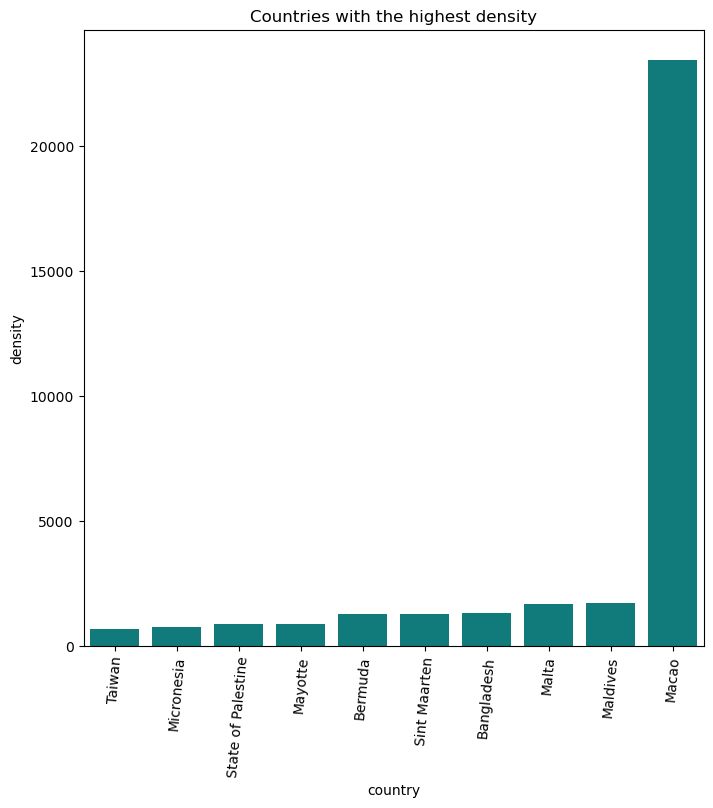

In [111]:
plt.figure(figsize=(8,8))
graph=sns.barplot(y='density',x='country', color="darkcyan",data=most_dense)
graph.set_title('Countries with the highest density')
plt.xticks(rotation=85)
plt.show()

In [112]:
high_world_share = data[['world_share', 'country']].sort_values(by="world_share",ascending=False)
high_world_share = high_world_share.head(10)
high_world_share = high_world_share.sort_values(by="world_share",ascending=True)
high_world_share

,world_share,country
132,1.60,Mexico
170,1.80,Russia
16,2.15,Bangladesh
27,2.69,Brazil
150,2.78,Nigeria
157,2.99,Pakistan
96,3.45,Indonesia
223,4.23,United States
42,17.72,China
95,17.76,India


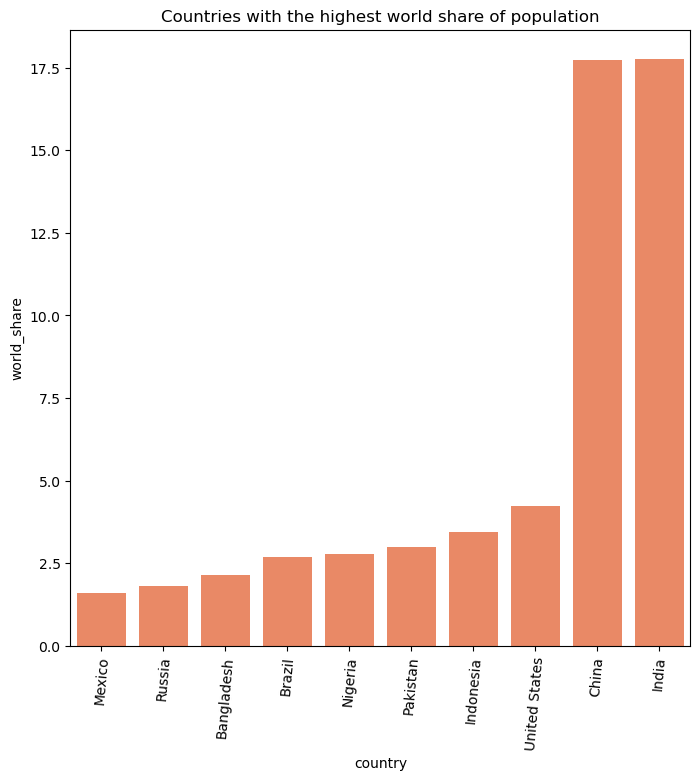

In [113]:
plt.figure(figsize=(8,8))
graph=sns.barplot(y='world_share',x='country', color="coral",data=high_world_share)
graph.set_title('Countries with the highest world share of population')
plt.xticks(rotation=85)
plt.show()

In [114]:
most_pop = data.groupby(['country']).sum()['population'].reset_index()
most_pop.sort_values(by=['population'], ascending=False, inplace=True)
most_pop = most_pop.head(10)
most_pop.sort_values(by=['population'], ascending=True, inplace=True)
most_pop

,country,population
124,Mexico,128455567
155,Russia,144444359
14,Bangladesh,172954319
25,Brazil,216422446
141,Nigeria,223804632
146,Pakistan,240485658
90,Indonesia,277534122
206,United States,339996563
40,China,1425671352
89,India,1428627663


In [115]:
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=most_pop['country'], y=most_pop['population'])])
fig.update_layout(title="Top 10 countries with the biggest population size", xaxis_title="Countries",
    yaxis_title="Population")
fig.show()

In [116]:
least_pop = data.groupby(['country']).sum()['population'].reset_index()
least_pop.sort_values(by=['population'], ascending=True, inplace=True)
least_pop = least_pop.head(10)
least_pop

,country,population
194,Tokelau,1893
142,Niue,1935
66,Faroe Islands,3791
129,Montserrat,4386
159,Saint Helena,5314
158,Saint Barthelemy,10994
201,Tuvalu,11396
211,Wallis & Futuna,11502
134,Nauru,12780
5,Anguilla,15899


In [117]:
fig = go.Figure([go.Bar(x=least_pop['country'], y=least_pop['population'])])
fig.update_layout(title="Top 10 countries with the smallest population size", xaxis_title="Countries",
    yaxis_title="Population")
fig.show()

In [118]:
most_decline = data.groupby(['country']).sum()['net_change'].reset_index()
most_decline.sort_values(by=['net_change'], ascending=True, inplace=True)
most_decline = most_decline.head(10)
most_decline

,country,net_change
203,Ukraine,-2957105
98,Japan,-657179
155,Russia,-268955
40,China,-215985
96,Italy,-166712
106,Lebanon,-135809
28,Bulgaria,-94236
75,Germany,-75210
168,Serbia,-72288
77,Greece,-43694


In [119]:
fig = go.Figure([go.Bar(x=most_decline['country'], y=most_decline['net_change'])])
fig.update_layout(title="Top 10 countries with the highest population loss", xaxis_title="Countries",
    yaxis_title="Net Change")
fig.show()

In [120]:
most_incline = data.groupby(['country']).sum()['net_change'].reset_index()
most_incline.sort_values(by=['net_change'], ascending=False, inplace=True)
most_incline = most_incline.head(10)
most_incline = most_incline.sort_values(by="net_change", ascending=True)
most_incline

,country,net_change
58,Egypt,1726495
14,Bangladesh,1767947
151,Philippines,1778359
190,Tanzania,1940358
90,Indonesia,2032783
64,Ethiopia,3147136
56,Dominican Republic,3252596
146,Pakistan,4660796
141,Nigeria,5263420
89,India,11454490


In [121]:
fig = go.Figure([go.Bar(x=most_incline['country'], y=most_incline['net_change'])])
fig.update_layout(title="Top 10 countries with the highest population growth", xaxis_title="Countries",
    yaxis_title="Net Change")
fig.show()

In [122]:
from statistics import mean

mean(data['fertility_rate'])

2.4546296296296295

In [133]:
fig = px.scatter_geo(data, locations='country',locationmode="country names",scope="world",color="fertility_rate", size="population", size_max=25,title="Fertility rate across the countries",template='seaborn',color_continuous_scale="spectral")
fig.show()

In [123]:
compare_most = data[['population', 'country','fertility_rate']].sort_values(by="population",ascending=False)
compare_most = compare_most.head(10)
compare_most.head(10)

,population,country,fertility_rate
95,1428627663,India,2.0
42,1425671352,China,1.2
223,339996563,United States,1.7
96,277534122,Indonesia,2.1
157,240485658,Pakistan,3.3
150,223804632,Nigeria,5.1
27,216422446,Brazil,1.6
16,172954319,Bangladesh,1.9
170,144444359,Russia,1.5
132,128455567,Mexico,1.8


In [124]:
fig = go.Figure([go.Bar(x=compare_most['country'], y=compare_most['fertility_rate'])])
fig.update_layout(title="Fertility rates comparison in the top 10 most populated countries", xaxis_title="Countries",
    yaxis_title="Fertility Rate")
fig.show()

In [125]:
compare_least = data[['population', 'country','fertility_rate']].sort_values(by="population",ascending=True)
compare_least = compare_least.head(10)
compare_least.head(10)

,population,country,fertility_rate
210,1893,Tokelau,2.6
151,1935,Niue,2.4
68,3791,Faroe Islands,1.6
138,4386,Montserrat,1.6
173,5314,Saint Helena,1.6
172,10994,Saint Barthelemy,1.0
217,11396,Tuvalu,3.1
229,11502,Wallis & Futuna,1.9
143,12780,Nauru,3.4
6,15899,Anguilla,1.3


In [126]:
fig = go.Figure([go.Bar(x=compare_least['country'], y=compare_least['fertility_rate'])])
fig.update_layout(title="Fertility rates comparison in the top 10 least populated countries", xaxis_title="Countries",
    yaxis_title="Fertility Rate")
fig.show()